In [1]:
import sqlite3

# 1) Connect to (or create) the SQLite file.
# If 'sales_data.db' does not exist, this creates it in the current folder.
conn = sqlite3.connect("sales_data.db")

# 2) Create a cursor to run SQL commands.
cursor = conn.cursor()

# 3) Create the 'sales' table if it doesn't exist yet.
# Columns follow the task’s hint: product, quantity, price.
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product  TEXT,
    quantity INTEGER,
    price    REAL
)
""")

# 4) Insert some small sample data so your later query has something to read.
sample_data = [
    ("Pen", 10, 5),
    ("Pencil", 20, 2),
    ("Notebook", 5, 20),
    ("Pen", 15, 5),
    ("Notebook", 10, 20)
]
cursor.executemany("INSERT INTO sales VALUES (?, ?, ?)", sample_data)

# 5) Save changes to disk and close the connection.
conn.commit()
conn.close()

print("✅ Created sales_data.db with table 'sales' and inserted sample rows.")


✅ Created sales_data.db with table 'sales' and inserted sample rows.


In [2]:
import sqlite3
conn = sqlite3.connect("sales_data.db")
cur = conn.cursor()

# See the schema
cur.execute("PRAGMA table_info(sales)")
print("Table schema:", cur.fetchall())

# Peek at the data
cur.execute("SELECT * FROM sales")
rows = cur.fetchall()
print("Rows:")
for r in rows:
    print(r)

conn.close()


Table schema: [(0, 'product', 'TEXT', 0, None, 0), (1, 'quantity', 'INTEGER', 0, None, 0), (2, 'price', 'REAL', 0, None, 0)]
Rows:
('Pen', 10, 5.0)
('Pencil', 20, 2.0)
('Notebook', 5, 20.0)
('Pen', 15, 5.0)
('Notebook', 10, 20.0)


In [3]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("sales_data.db")

query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
print(df)

conn.close()


    product  total_qty  revenue
0  Notebook         15    300.0
1       Pen         25    125.0
2    Pencil         20     40.0


In [6]:
conn = sqlite3.connect("sales_data.db")

In [7]:
df = pd.read_sql_query(query, conn)
print(df)

    product  total_qty  revenue
0  Notebook         15    300.0
1       Pen         25    125.0
2    Pencil         20     40.0


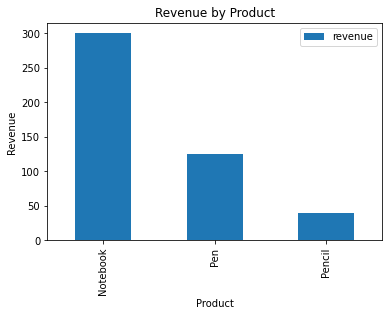

In [8]:
import matplotlib.pyplot as plt

# Plot bar chart
df.plot(kind='bar', x='product', y='revenue')

# Add labels and title
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")

# Show the chart
plt.show()

In [9]:
plt.savefig("sales_chart.png")

<Figure size 432x288 with 0 Axes>